# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1 Import necessary libraries

In [1]:
!pip install seaborn

In [2]:
# Libraries to load data
import pandas as pd
import numpy as np

# Libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries to create and evaluate models


#### 2. Load the data from csv file to `pandas` dataframe

In [5]:
df = pd.read_csv('car_data.csv')


#### 3. Inspect the first 5 rows of the dataframe

In [6]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### 4. Check the number of rows and columns

In [7]:
df.shape

(804, 12)

In [8]:
len(df), len(df.columns)

(804, 12)

#### 5. Get some information about the dataset via `.info()`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#### 6. Check number of missing values per columns

In [12]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

#### 7. Get table of distributions each features and visualize this distribution.

In [13]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [18]:
df[['Mileage','Model','Doors','Cruise','Cylinder','Sound','Leather']].describe()

,Mileage,Doors,Cruise,Cylinder,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,3.527363,0.752488,5.268657,0.679104,0.723881
std,8196.319707,0.850169,0.431836,1.387531,0.467111,0.447355
min,266.000000,2.000000,0.000000,4.000000,0.000000,0.000000
25%,14623.500000,4.000000,1.000000,4.000000,0.000000,0.000000
50%,20913.500000,4.000000,1.000000,6.000000,1.000000,1.000000
75%,25213.000000,4.000000,1.000000,6.000000,1.000000,1.000000
max,50387.000000,4.000000,1.000000,8.000000,1.000000,1.000000


#### 8. Visualize correlation coefficient between features and label.

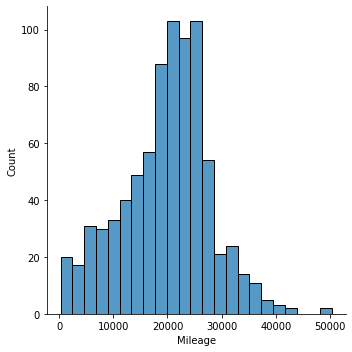

In [19]:
sns.displot(data = df['Mileage'])

<AxesSubplot:>

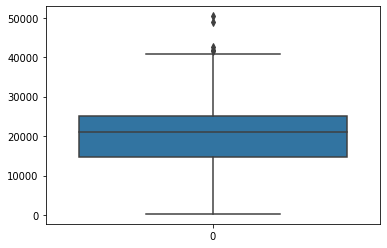

In [22]:
sns.boxplot(data = df['Mileage'])

<AxesSubplot:>

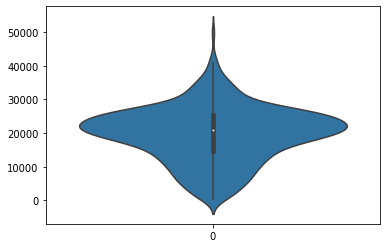

In [23]:
sns.violinplot(data = df['Mileage'])

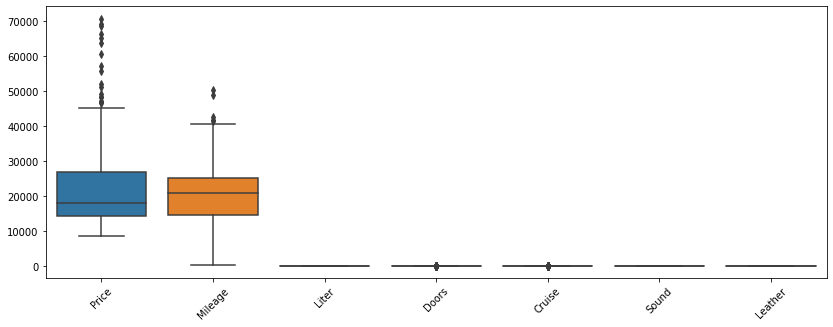

In [24]:
plt.figure(figsize=(14,5))
sns.boxplot(data = df.drop(columns=['Cylinder','Leather']))
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

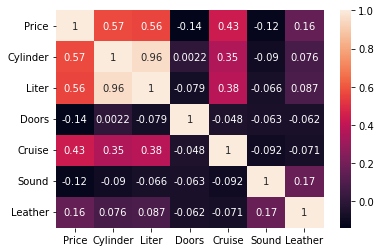

In [26]:
sns.heatmap(df.drop(columns='Mileage').corr(),annot=True)

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

#### 11. Evaluate your model performance using R-squared Error.

#### 12. Visualize the actual prices and predicted prices of the test set.